# Pre-processing for Second Capstone
### Goals:
1. Final Cleanup of dataset, eliminating or imputing all null values
2. Creation of dummy variable for categorical data
3. Scaling the data
4. Evaluation of 3 models: Decision Tree, Random Forest, ----


In [1]:
#Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import calendar

import scipy.stats
from scipy.stats import t
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

# Random Forest
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
#load the cleaned dataset from EDA section
file = '/Users/sangeetajayakar/Springboard_Course/Files_for_second_capstone/weatherAUS_files/rain_data_cleaned_4.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,RainTomorrow,Month,Year,Pressure_Diff,Humidity_Diff
0,0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,22.0,1007.1,NaN,0.0,0,12,2008,-0.6,-49.0
1,1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,25.0,1007.8,NaN,0.0,0,12,2008,-2.8,-19.0
2,2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,30.0,1008.7,2.0,0.0,0,12,2008,1.1,-8.0
3,3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,16.0,1012.8,NaN,0.0,0,12,2008,-4.8,-29.0
4,4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,33.0,1006.0,8.0,0.0,0,12,2008,-4.8,-49.0


In [3]:
# inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     142193 non-null  int64  
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   Humidity3pm    138583 non-null  float64
 10  Pressure3pm    128212 non-null  float64
 11  Cloud3pm       85099 non-null   float64
 12  RainToday      140787 non-null  float64
 13  RainTomorrow   142193 non-null  int64  
 14  Month          142193 non-null  int64  
 15  Year           142193 non-null  int64  
 16  Pressure_Diff  127989 non-null  float64
 17  Humidity_Diff  137907 non-nul

In [4]:
# 3 columns with half of the values missing, we will impute null values in these columns with the median
df[['Evaporation', 'Sunshine', 'Cloud3pm']] = df[['Evaporation', 'Sunshine', 'Cloud3pm']].fillna(df.median())
df.isnull().sum()

Unnamed: 0           0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed     9270
Humidity3pm       3610
Pressure3pm      13981
Cloud3pm             0
RainToday         1406
RainTomorrow         0
Month                0
Year                 0
Pressure_Diff    14204
Humidity_Diff     4286
dtype: int64

In [5]:
df.shape
#df.dropna(thresh=16)

# if a row has more than 2 missing values, we will drop the row
#d = np.where(df.isnull().sum(axis=1)>2)
#df = df.drop(df.index[d])
#df.isnull().sum()

(142193, 18)

<AxesSubplot:>

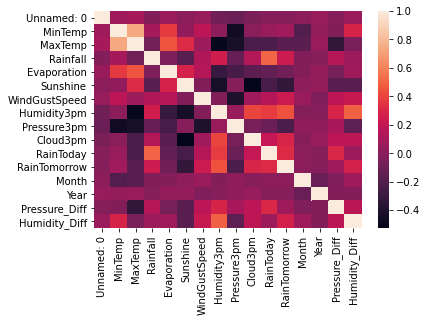

In [6]:
sns.heatmap(df.corr())

In [7]:
# Month and Year columns must be changed to categorical values
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Month'].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

In [8]:
df['Year'] = df['Year'].astype('object')

In [9]:
df['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=object)

In [10]:
#drop unnamed column
df = df.drop(['Unnamed: 0'], axis = 1)
df.shape

(142193, 17)

In [11]:
df = df.dropna()
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
Humidity3pm      0
Pressure3pm      0
Cloud3pm         0
RainToday        0
RainTomorrow     0
Month            0
Year             0
Pressure_Diff    0
Humidity_Diff    0
dtype: int64

In [12]:
df.shape

(119674, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119674 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       119674 non-null  object 
 1   MinTemp        119674 non-null  float64
 2   MaxTemp        119674 non-null  float64
 3   Rainfall       119674 non-null  float64
 4   Evaporation    119674 non-null  float64
 5   Sunshine       119674 non-null  float64
 6   WindGustDir    119674 non-null  object 
 7   WindGustSpeed  119674 non-null  float64
 8   Humidity3pm    119674 non-null  float64
 9   Pressure3pm    119674 non-null  float64
 10  Cloud3pm       119674 non-null  float64
 11  RainToday      119674 non-null  float64
 12  RainTomorrow   119674 non-null  int64  
 13  Month          119674 non-null  object 
 14  Year           119674 non-null  object 
 15  Pressure_Diff  119674 non-null  float64
 16  Humidity_Diff  119674 non-null  float64
dtypes: float64(12), int64(1), obj

### Create dummy variables for categorical features

In [14]:
dfo = df.select_dtypes(include=['object'])
dfo.shape
#get levels for all categorical variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Location,44
1,WindGustDir,16
2,Month,12
3,Year,11


##### Observation: 
The number of 'Locations' dropped from 49 to 44 indicating that there were 5 locations that did not record measurments for many of the features.

In [15]:
# get list of all columns
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm',
       'Cloud3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year',
       'Pressure_Diff', 'Humidity_Diff'],
      dtype='object')

In [16]:
# features except Target feature
feature_cols = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm',
       'Cloud3pm', 'RainToday', 'Month',
       'Pressure_Diff', 'Humidity_Diff']
new_X = df[feature_cols]
new_X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm',
       'Cloud3pm', 'RainToday', 'Month', 'Pressure_Diff', 'Humidity_Diff'],
      dtype='object')

In [17]:
# create dataframe with features and dummy variables called features_df
features_df = pd.get_dummies(new_X)
features_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,13.4,22.9,0.6,4.8,8.5,44.0,22.0,1007.1,5.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,25.0,1007.8,5.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,4.8,8.5,46.0,30.0,1008.7,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,4.8,8.5,24.0,16.0,1012.8,5.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,33.0,1006.0,8.0,0.0,...,1,0,0,0,0,0,0,0,0,0


### Split into Train and Test sets

In [18]:
# define your X and y
X = features_df
y = df['RainTomorrow']

# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Scale the Data
Note: this is commented out because we don't need to scale data for the Decision Tree model which is the first model we will test.

In [19]:
# build scaler based on training data and apply it to test data to then also scale the test data
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled=scaler.transform(X_train)
#X_test_scaled=scaler.transform(X_test)


## Three models to try:  
1. Decision tree
2. Random Forest  
3. Logistic Regression

### 1. Decision Tree: 

#### Gini impurity model - max depth 3
first attempt at decision tree just to get an idea:

In [20]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

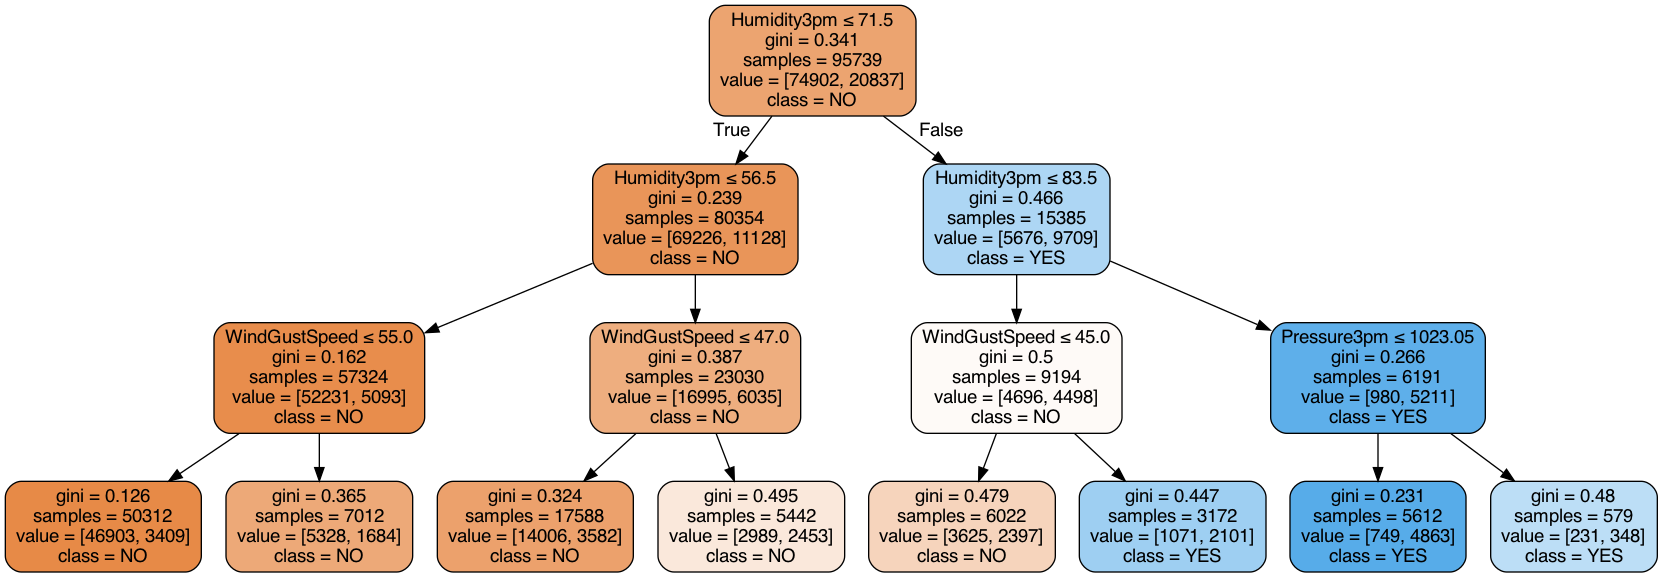

In [21]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Gini impurity  model - max depth 3
Accuracy: 0.8300814706496762
Balanced accuracy: 0.6573051249535438
Precision score 0.7734505862646566
Recall score 0.9708544337894623


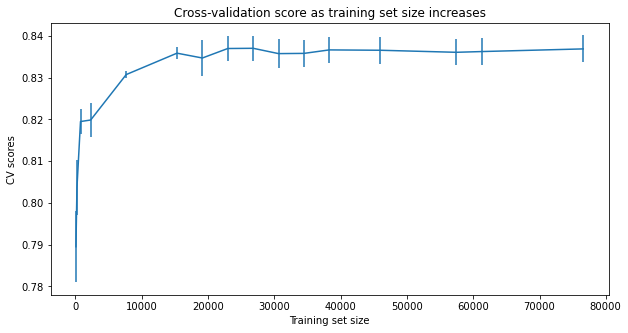

In [23]:
# test different training set sizes to determine the optimal size of training set. use the learning curve function
# 10, 100, go on a log scale...

fractions = [0.001, 0.003, 0.01, 0.03, 0.1, .2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1]
train_size, train_scores, test_scores = learning_curve(gini_model2, X_train, y_train, train_sizes=fractions, cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [24]:
# test out different max depths
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3

maxd = [1, 2, 3, 4, 6, 8, 10, 12, 14, 16]

precisionscore = [] 
accuracyscore = []

for d in maxd:
    gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=d)
    
    gini_model2.fit(X_train, y_train)
    y_pred = gini_model2.predict(X_test)
    #pd.Series(y_pred)
    #gini_model2
    precisionscore.append(metrics.precision_score(y_test,y_pred, pos_label = 1))
    accuracyscore.append(metrics.accuracy_score(y_test,y_pred))

[]

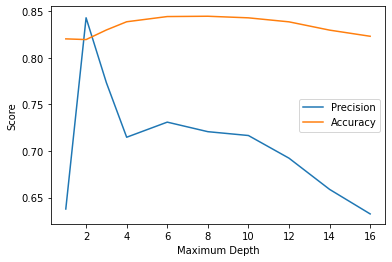

In [25]:
plt.plot(maxd, precisionscore, label='Precision') # Plot training error over domain
plt.plot(maxd, accuracyscore, label='Accuracy')
#plt.plot(x, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Score') # Label y-axis
plt.legend() # Show plot labels as legend
plt.plot() # Show graph